### Cryptocurrency Liquidity Prediction for Market Stability
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

# Problem Statement

* Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
 the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
 can lead to increased price fluctuations and market instability.

# WHAT IS CRYPTOCURRENCY
*Cryptocurrency is a form of digital money. It relies on cryptographic techniques for security, and typically runs on blockchain technology—a decentralized, distributed ledger that records transactions transparently.

*Unlike traditional currencies, it's not issued by governments or central banks.

*Examples include Bitcoin (BTC), Ethereum (ETH), Binance Coin (BNB), etc.

*Users can send/receive funds without intermediaries (like banks).

IMPORT important packages and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
train_df = pd.read_csv('data\coin_gecko_2022-03-16.csv')
test_df = pd.read_csv('data\coin_gecko_2022-03-17.csv')


In [4]:
# see both df column
print("Columns name of train dataset",train_df.columns)
print('Columns name of test dataset',test_df.columns)

Columns name of train dataset Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')
Columns name of test dataset Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')


In [5]:
#we saw top 5 data
train_df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


### FEATURE INFORMATION

 
1.COIN >> The name of the cryptocurrency (e.g., "Bitcoin", "Ethereum")

2. SYMBOL >> The trading ticker for the coin (e.g., "BTC", "ETH").

3. PRICE >> Current price of the cryptocurrency in USD (or your data’s currency).

4. 1h >> Percentage price change over the past 1 hour

5. 24h >> Percentage price change over the past 24 hours.

6. 7d >> Percentage price change over the past 7 days.

8. 24h_volume >> Total trading volume in USD over the past 24 hours.

9. mkt_cap >> Market capitalization (price × circulating supply).

10. date >> The date the data was collected.

In [6]:
# types of columns in datasets
train_df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [7]:
#we see date is object column , we need to convert it into datetime
train_df['date']=pd.to_datetime(train_df['date'],errors='coerce')

In [8]:
#types of columns 
train_df.dtypes

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object

In [9]:
#summary of datasets >> 5 point summary
train_df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,5.000000e+02,497.000000,497.000000,497.000000,4.970000e+02,5.000000e+02,500
mean,6.527851e+02,0.018746,0.028849,0.039016,3.276644e+08,3.722677e+09,2022-03-16 00:00:00
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.904625e-01,0.011000,0.004000,-0.020000,1.838591e+06,1.146391e+08,2022-03-16 00:00:00
50%,1.085000e+00,0.018000,0.021000,0.006000,8.581305e+06,2.083208e+08,2022-03-16 00:00:00
75%,6.925000e+00,0.026000,0.040000,0.049000,4.075655e+07,5.845642e+08,2022-03-16 00:00:00
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11,2022-03-16 00:00:00
std,4.578529e+03,0.013867,0.058065,0.203688,3.182264e+09,3.784349e+10,NaN


In [10]:
#check nulltype and dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        500 non-null    object        
 1   symbol      500 non-null    object        
 2   price       500 non-null    float64       
 3   1h          497 non-null    float64       
 4   24h         497 non-null    float64       
 5   7d          497 non-null    float64       
 6   24h_volume  497 non-null    float64       
 7   mkt_cap     500 non-null    float64       
 8   date        500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 35.3+ KB


In [11]:
#check null value
train_df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

In [12]:
#fill null value
for col in ['1h','24h','7d','24h_volume']:
    train_df[col]=train_df[col].fillna(train_df[col].median())

In [13]:
#check null value
train_df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

**We have treat missimng value**

**WE DON"T WANT TO OUTLIER TREATMENT BECAUSE IT IS ABOUT VALUE AND PRICE OF CRPYTOCURRENCY WHICH MAY GO EXTREME LOWER AND HIGHER**

## UNIVARIATE ANALYSIS

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

In [14]:
train_df.dtypes

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object

In [15]:
cat_col=[col for col in train_df.columns if train_df[col].dtypes=='object']
num_col=[col for col in train_df.columns if train_df[col].dtypes=='float64']

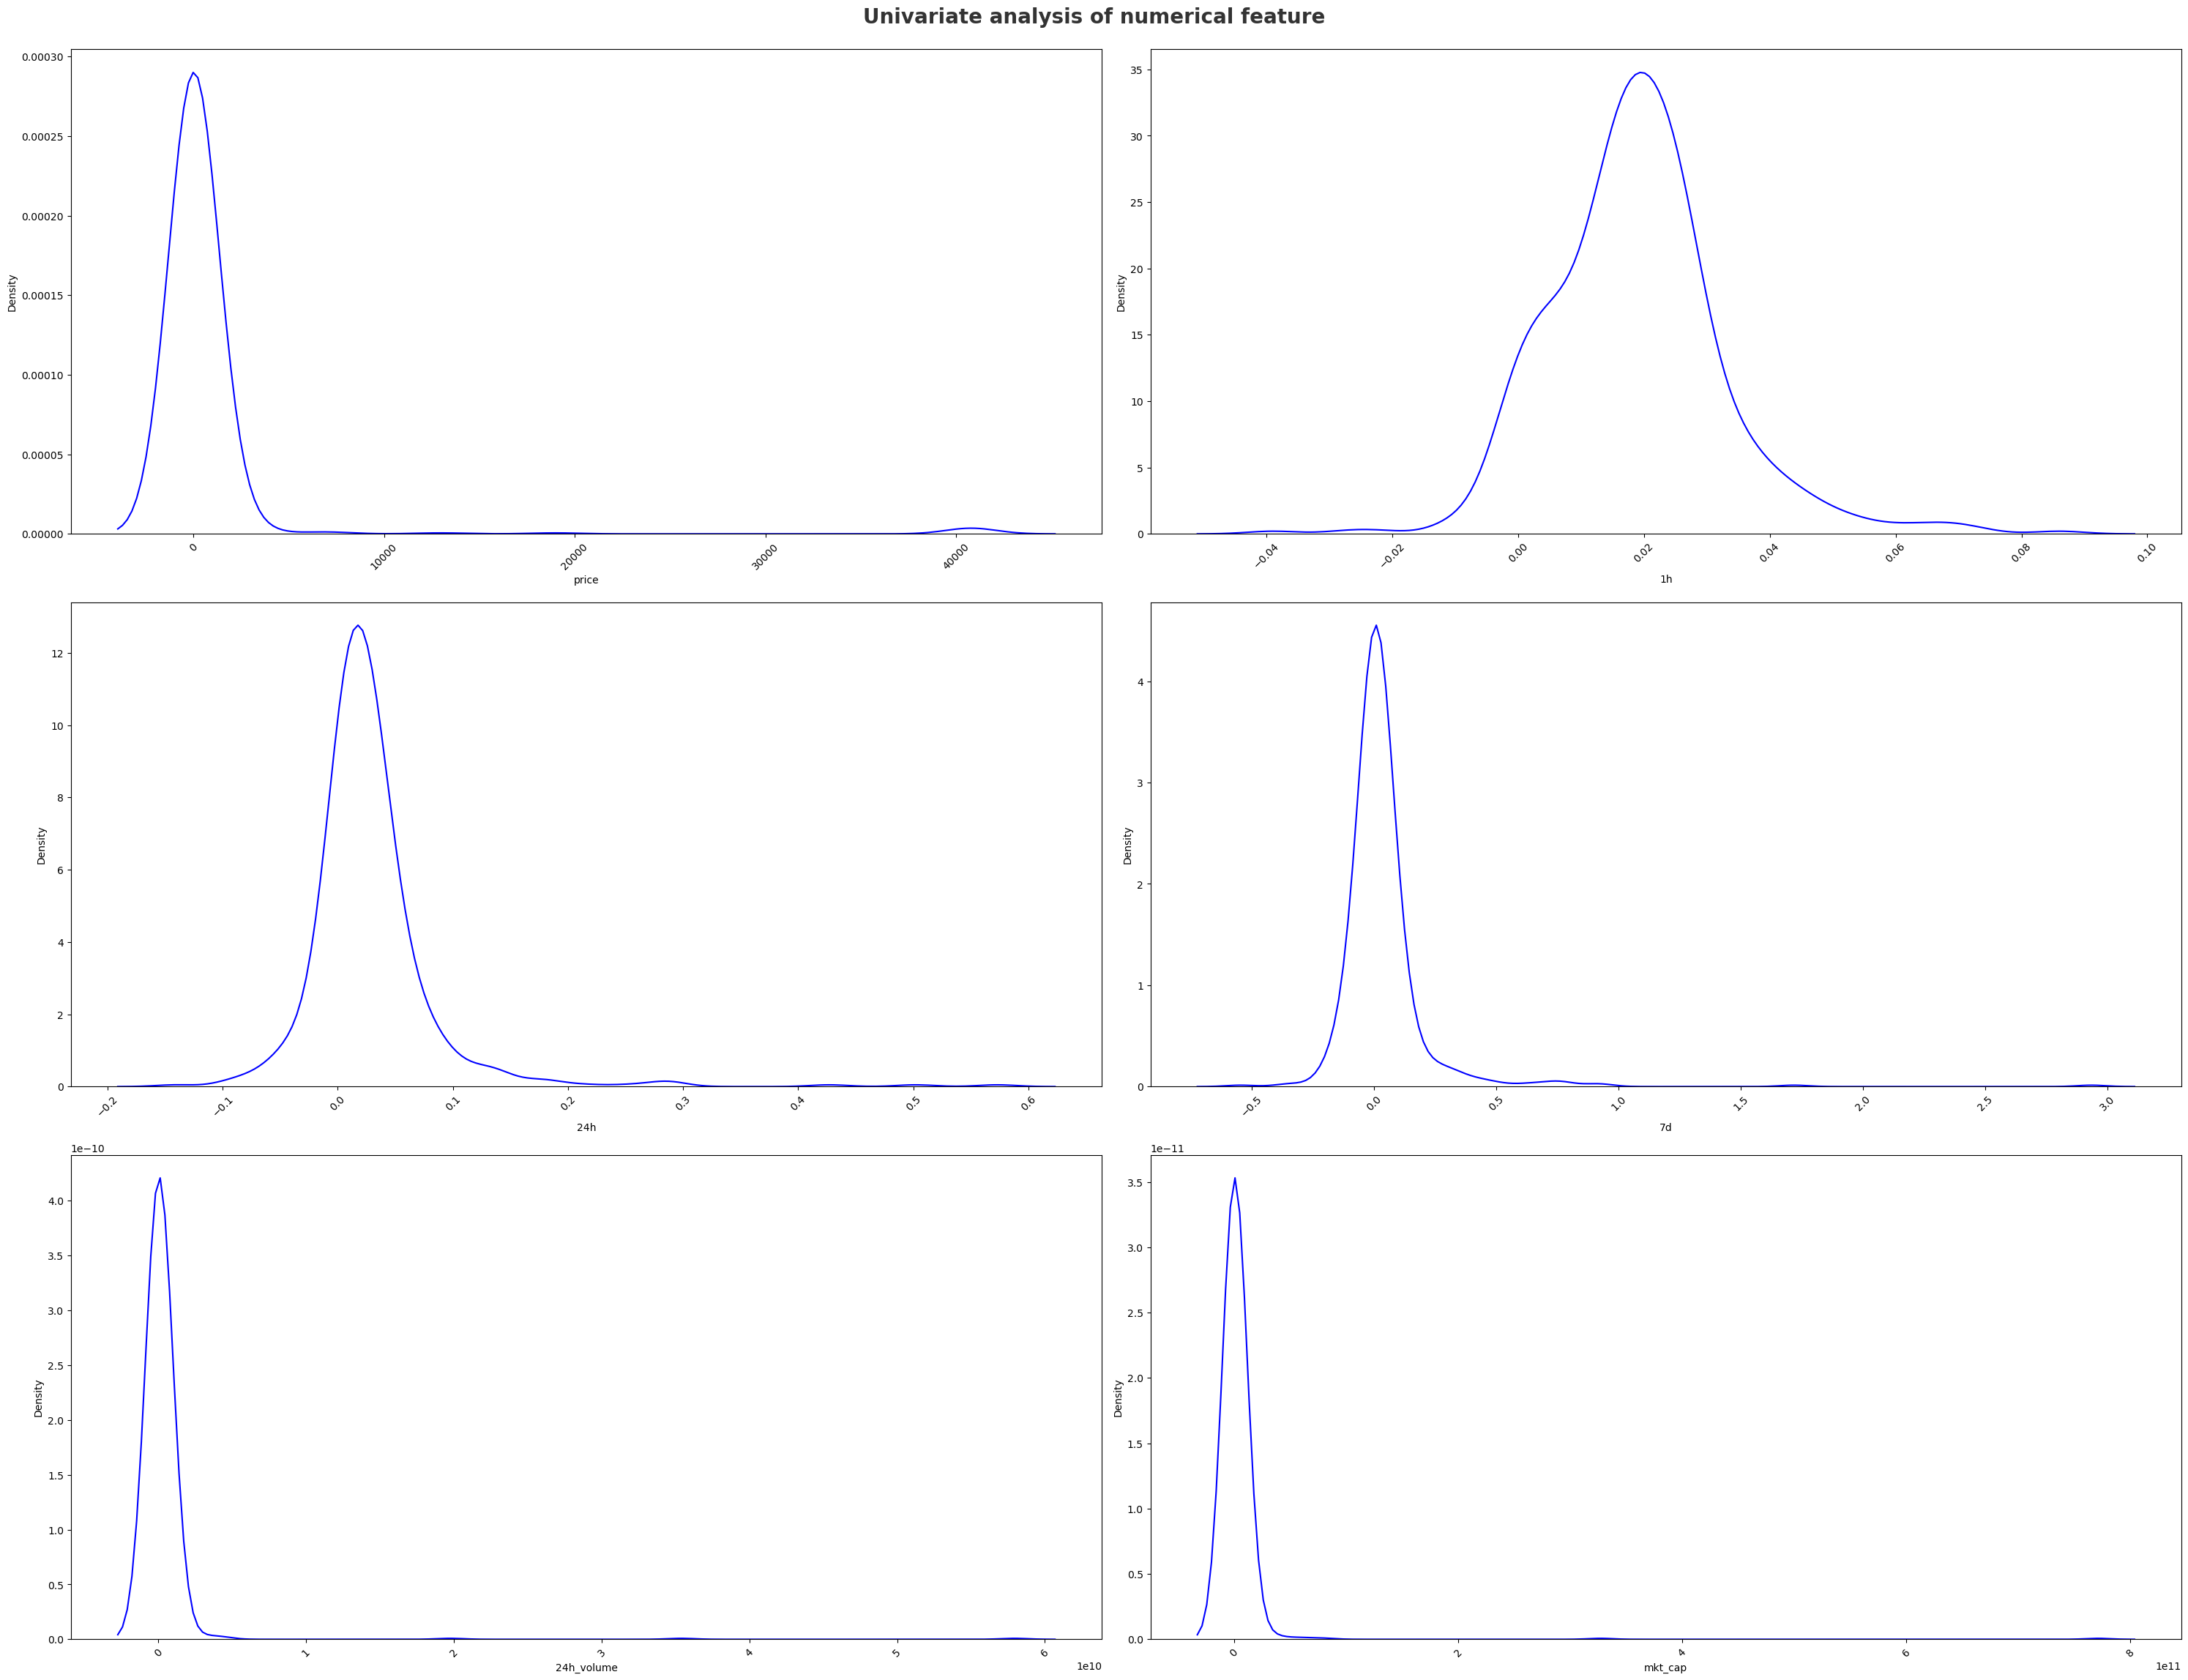

In [16]:
# for numerical col
plt.figure(figsize=(30,30))
plt.suptitle('Univariate analysis of numerical feature',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(num_col)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=train_df[num_col[i]],color='blue')
    plt.xlabel(num_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()

## REPORT OF UNIVARIATE ANALYSIS


PRICE >>Extremely right-skewed,Most coins have low prices, but a few (like BTC or ETH) have very high prices.

1h >> Very sharp central peak,Most coins have small % changes in 1 hour.

24h >> strong central peak,Majority of 24h changes are small, with few extreme moves.

7d >> Sharp peak with slight spread,Slightly more variability over 7 days than 1h or 24h.

24h_volume >> Extremely right-skewed,Most coins have low trading volume; a few are highly traded.

mkt_cap >> Very sharp peak near zero with extreme outliers,Most projects are small-cap; a few dominate the market cap.

**CATEGRORICAL COLUMNS**

In [17]:
for i,col in enumerate(cat_col):
    print(f"total number of value counts in {col} : {train_df[col].value_counts()}")

total number of value counts in coin : coin
Bitcoin            1
Orchid Protocol    1
Metadium           1
Iron Bank EURO     1
Prometeus          1
                  ..
SwissBorg          1
SKALE              1
APENFT             1
0x                 1
Oxygen             1
Name: count, Length: 500, dtype: int64
total number of value counts in symbol : symbol
TIME    2
FEG     2
RUNE    2
BTC     1
OXT     1
       ..
CHSB    1
SKL     1
NFT     1
ZRX     1
OXY     1
Name: count, Length: 497, dtype: int64


## TREND OF MARKET OF CRPTOCURRENCY

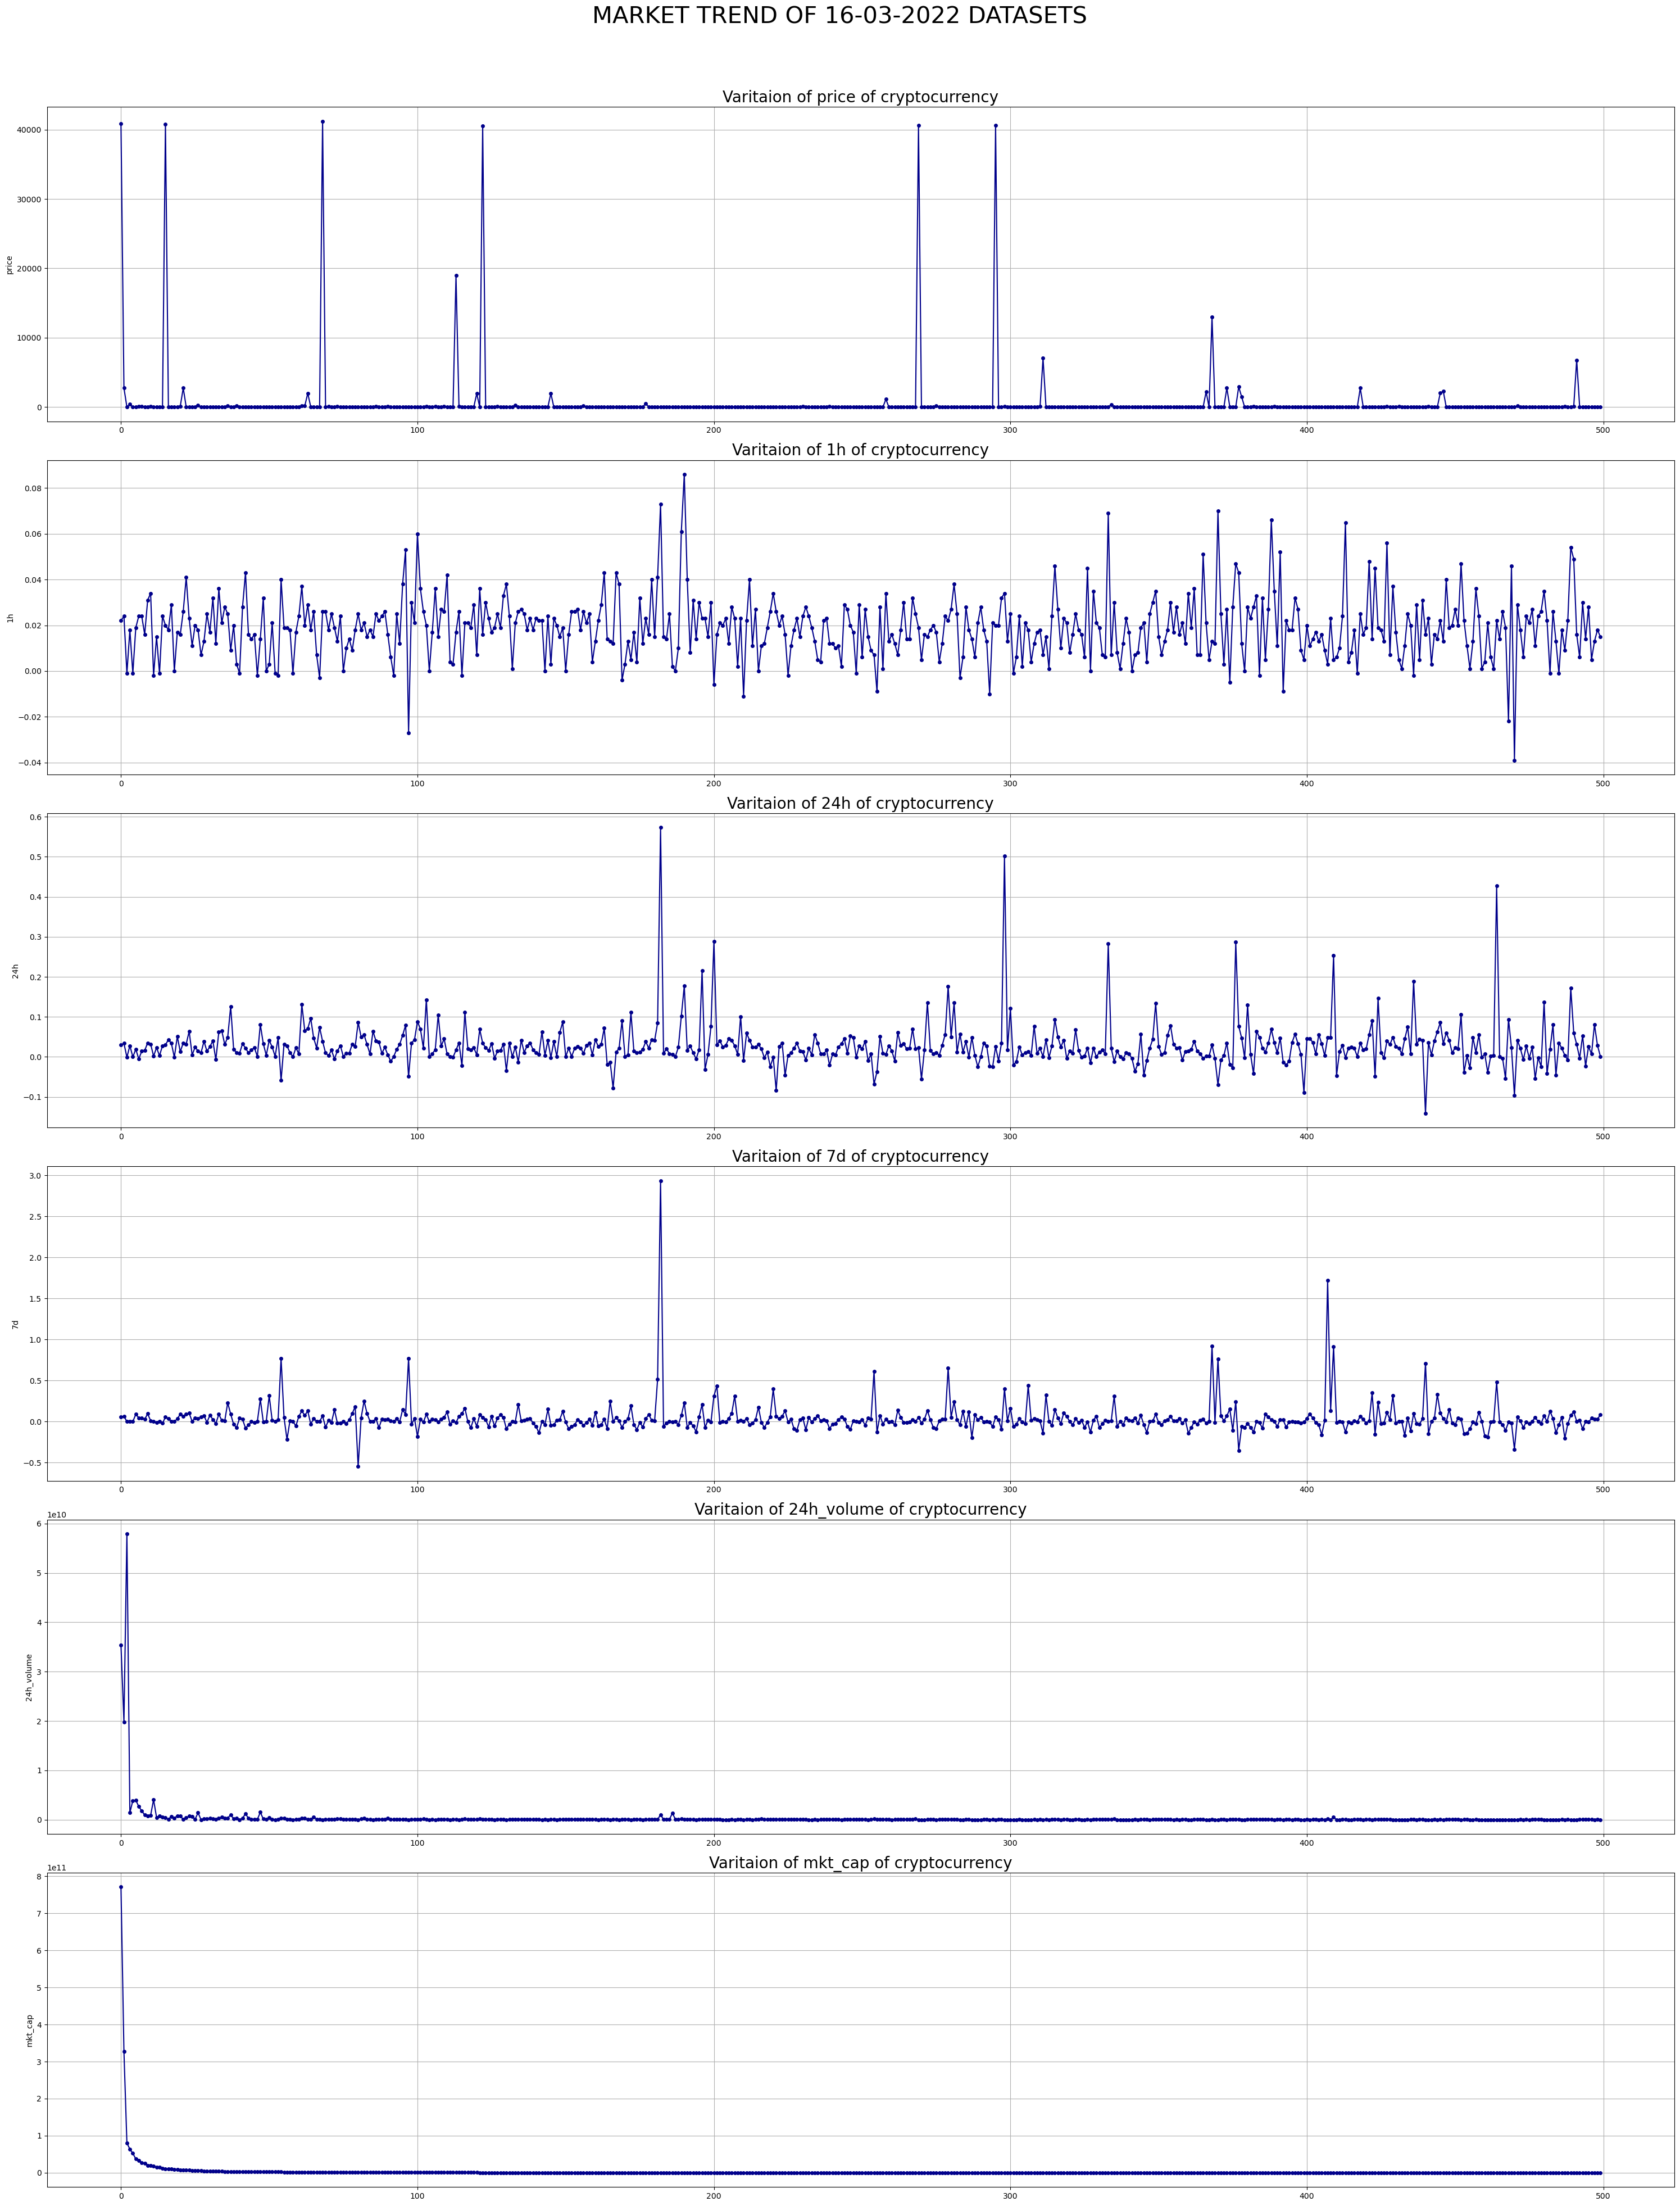

In [18]:
plt.figure(figsize=(30,40))
plt.suptitle("MARKET TREND OF 16-03-2022 DATASETS",fontsize=30)
for i,col in enumerate(num_col):
    plt.subplot(6,1,i+1)
    plt.plot(train_df[col],color='darkblue',marker='o', markersize=4, linestyle='-')
    plt.title(f"Varitaion of {col} of cryptocurrency",fontsize=20)
    plt.ylabel(col)
    plt.grid(True)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### analysis of 16-03-2022 data sets above plot
1. Price >> few cryptocurrency which value is greater than 1000 and large amount of cryptocurrency which value is very low
2. 1h >> high fluctuating in change in rate of cryptocurrency but percentage is very low
3. 24h >> similar to 1h but more amplified spikes, indicating daily momentum or panic buying/selling.
4. 7d >> weekly trend >> similarly fluctuating to 1h and 24h but few cryptocurrency changes trend greater than 2%
5. 24h_volume >> Y-axis shows extremely high values — in the range of billions (10¹⁰) >> some cryptocurrency controls the market and other have low market trend
6. mkt_cap >> Y-axis shows extremely high values — in the range of billions (10^11) >> similar to the 24h_volume >> some cryptocurrency controls the market i.e it has monopoly in market

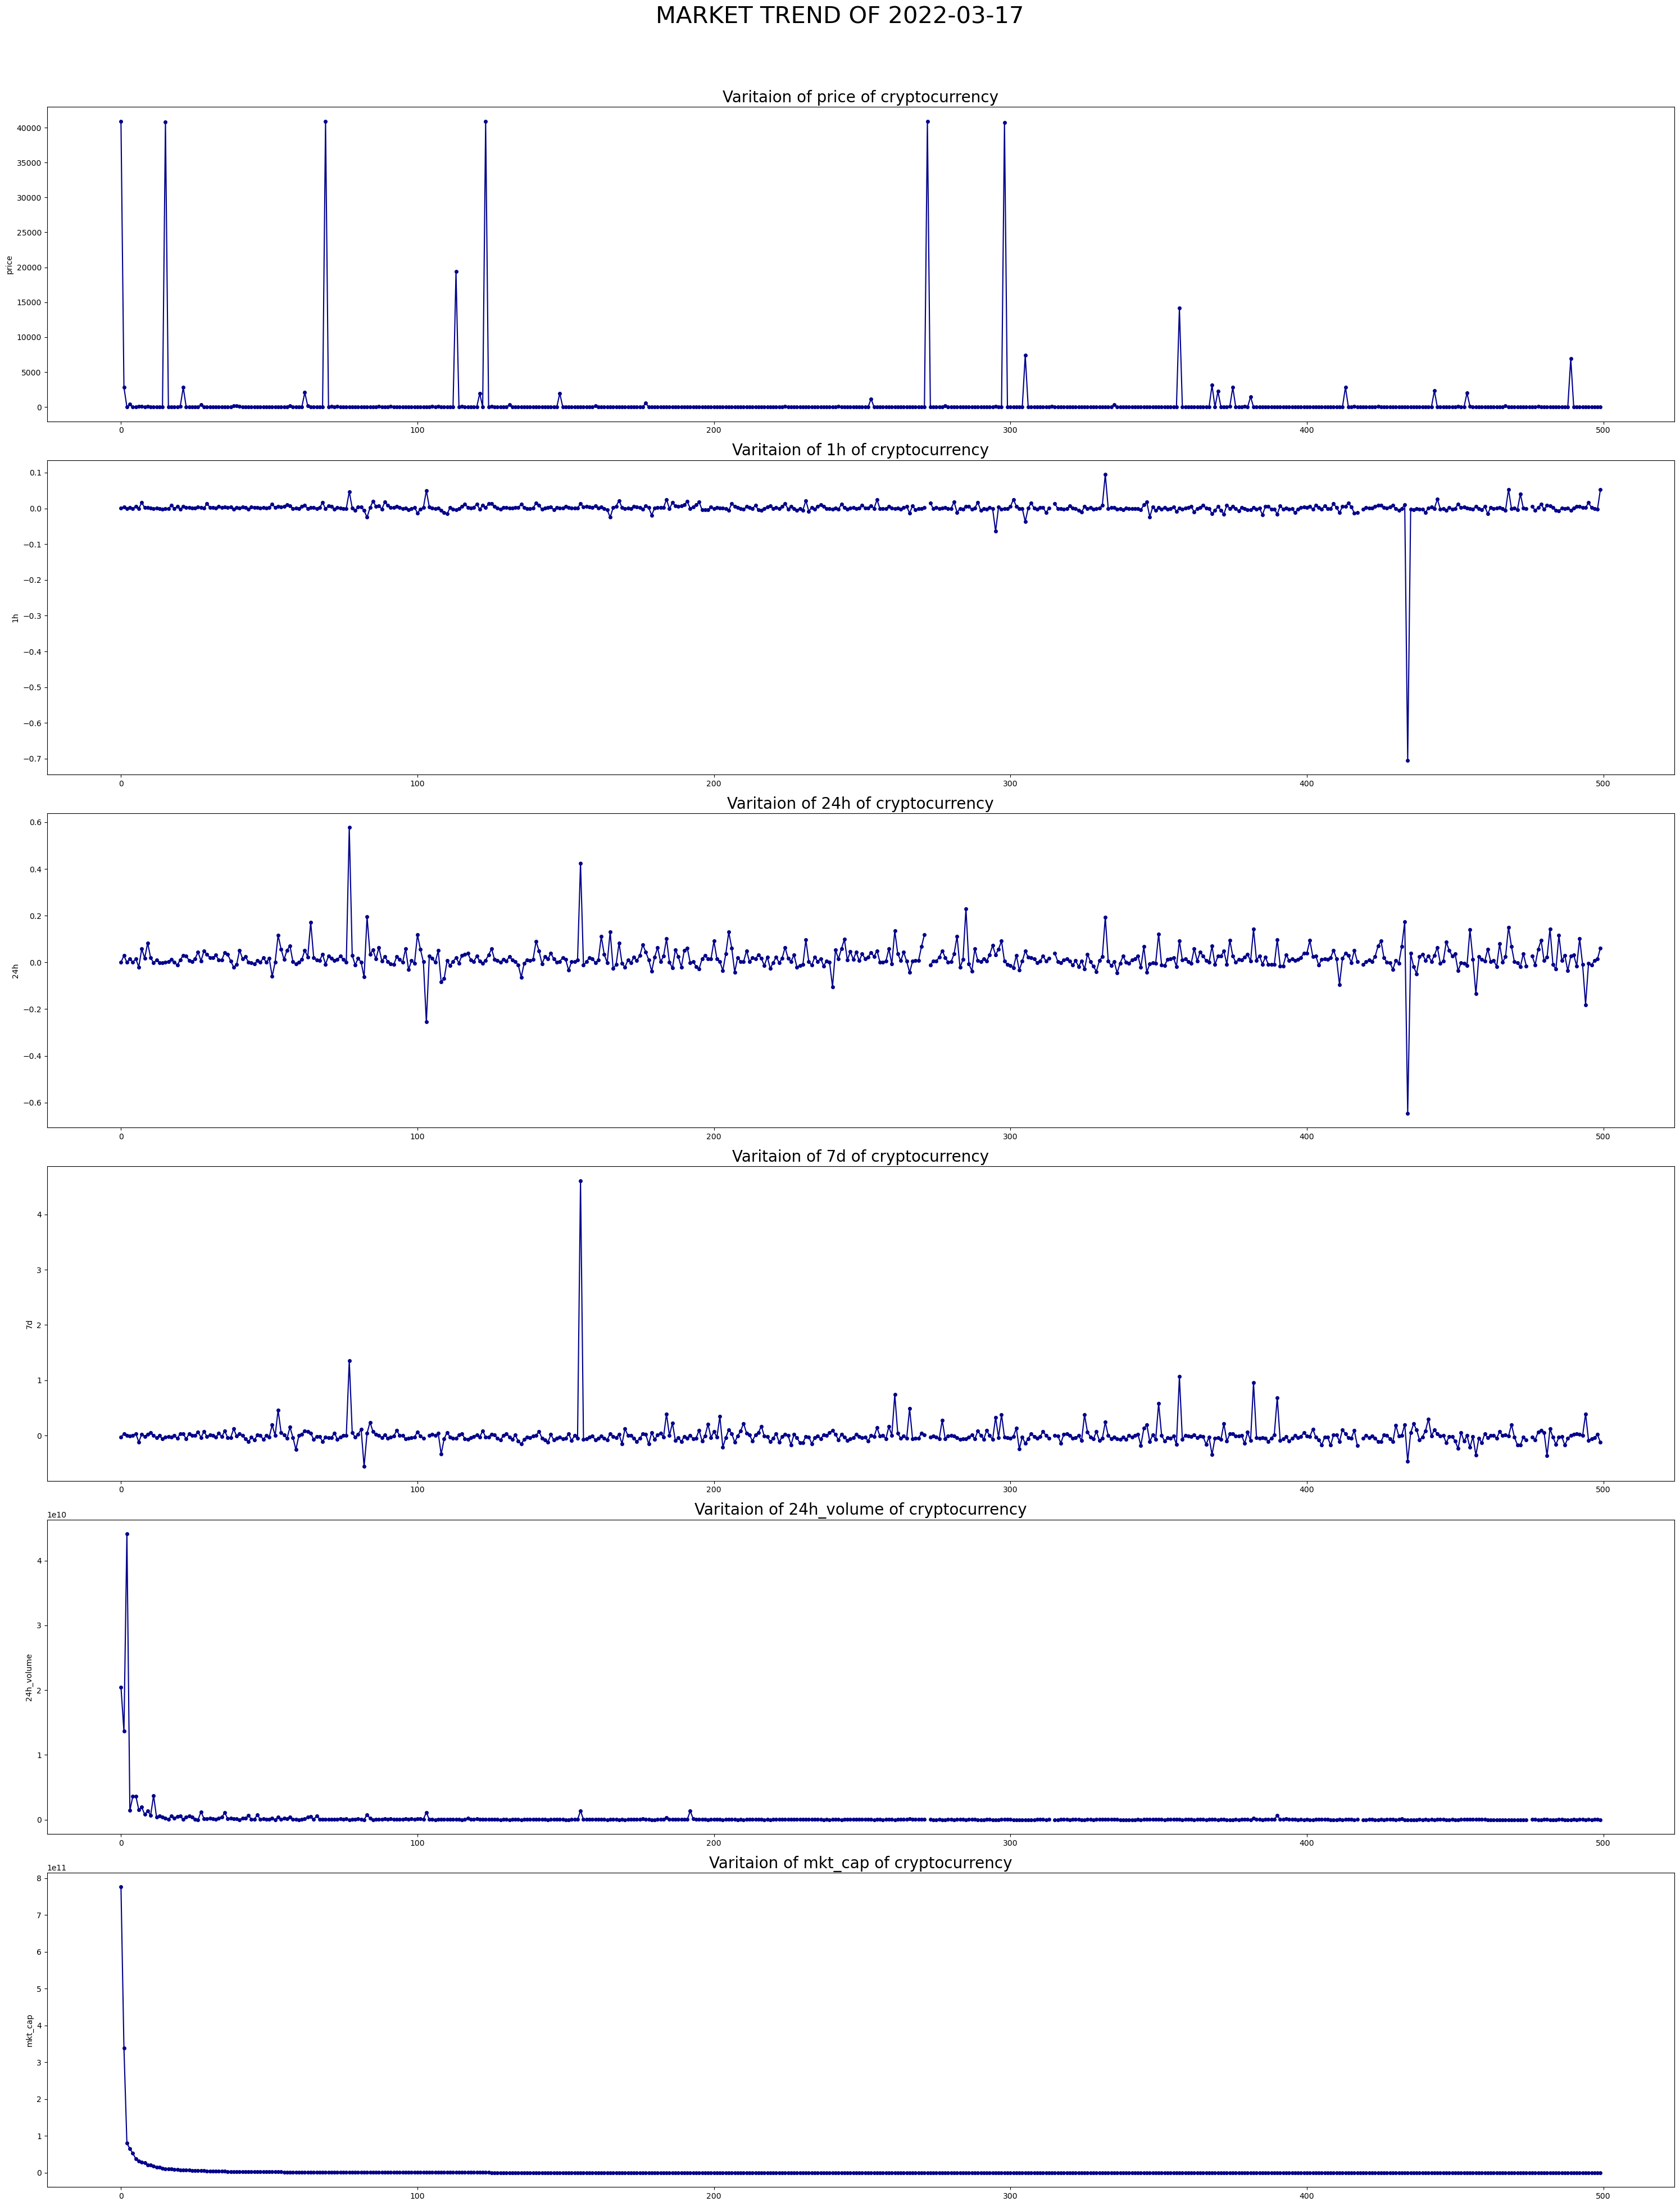

In [19]:
plt.figure(figsize=(30,40))
plt.suptitle("MARKET TREND OF 2022-03-17",fontsize=30)
for i,col in enumerate(num_col):
    plt.subplot(6,1,i+1)
    plt.plot(test_df[col],color='darkblue',marker='o', markersize=4, linestyle='-')
    plt.title(f"Varitaion of {col} of cryptocurrency",fontsize=20)
    plt.ylabel(col)
    
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

### MULTIVARIATE ANALYSIS

In [20]:
#CHECK MULTICOLLINEARITY
corr=train_df.corr(numeric_only=True)
corr

,price,1h,24h,7d,24h_volume,mkt_cap
price,1.000000,0.011263,0.002027,0.025383,0.195441,0.368096
1h,0.011263,1.000000,0.322845,0.152647,-0.044017,0.006495
24h,0.002027,0.322845,1.000000,0.441938,-0.011984,-0.003603
7d,0.025383,0.152647,0.441938,1.000000,0.009265,0.003822
24h_volume,0.195441,-0.044017,-0.011984,0.009265,1.000000,0.644003
mkt_cap,0.368096,0.006495,-0.003603,0.003822,0.644003,1.000000


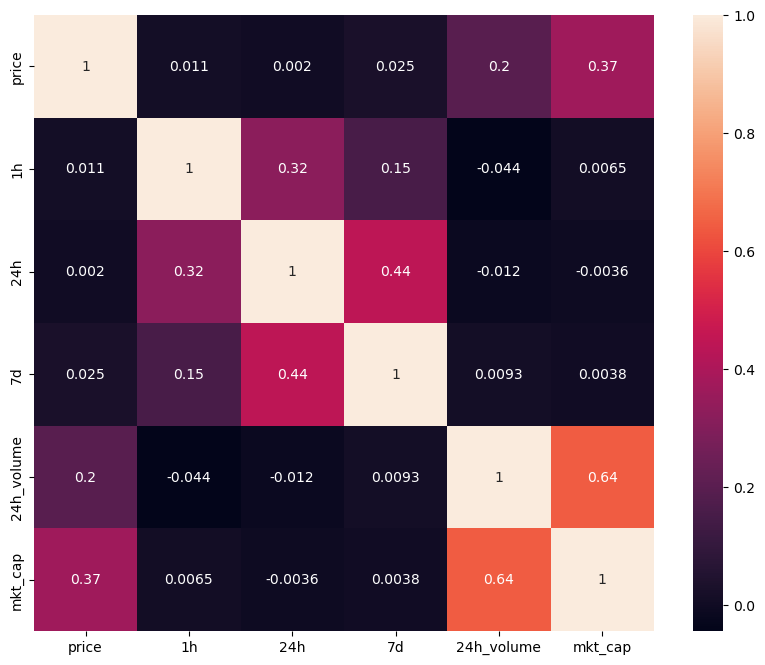

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [32]:
for i,col in enumerate(num_col):
    print(train_df[col].values,i)

[4.08594600e+04 2.74441000e+03 1.00000000e+00 3.83430000e+02
 9.99874000e-01 7.85018000e-01 8.95100000e+01 8.56100000e+01
 8.24161000e-01 1.85500000e+01 7.36900000e+01 1.00000000e+00
 1.15660000e-01 1.00000000e+00 2.24181500e-05 4.08204400e+04
 4.01575000e-01 1.44000000e+00 9.99429000e-01 2.88000000e+01
 1.09440000e+02 2.74531000e+03 1.06100000e+01 1.44100000e+01
 6.07518759e-02 4.23700000e+01 2.95570000e+02 5.97000000e+00
 1.90500000e+01 7.31009000e-01 1.86969000e-01 9.05000000e+00
 2.00008000e-01 5.04600000e+01 2.43000000e+00 2.69300000e+01
 1.62550000e+02 3.08000000e+00 1.62600000e+01 1.89340000e+02
 5.37100000e+01 4.78480546e-02 1.22000000e+00 1.72700000e+01
 9.39000000e+00 1.10000000e+00 9.98392000e-01 2.86200000e+01
 2.82000000e+00 9.97676000e-01 4.40816000e-01 3.05000000e+00
 2.25330073e-02 2.17200000e+01 7.23000000e+00 2.06000000e+00
 3.40682150e-03 7.12336000e-01 2.18957902e-02 5.43000000e+00
 1.62482000e-01 1.37440000e+02 1.48940000e+02 1.98258000e+03
 3.83500000e+01 2.277810

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=train_df[num_col]
VIF=pd.DataFrame()
VIF['Feature']=X.columns
VIF['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF


,Feature,vif
0,price,1.180243
1,1h,1.408080
2,24h,1.687905
3,7d,1.288553
4,24h_volume,1.727686
5,mkt_cap,1.927889


WE have seen that all feature have greater less than 10 VIF value
So we can't drop any feature